# Autoencoder in PyTorch

## Table of Contents
1. [Overview](#overview)
2. [Prerequisites](#prerequisites)
3. [Implementation Steps](#implementation-steps)
4. [Results](#results)
5. [References](#references)

## Overview
This repository contains a simple implementation of an Autoencoder using PyTorch. Autoencoders are unsupervised neural networks used for dimensionality reduction and feature learning.

![Autoencoder Architecture](https://raw.githubusercontent.com/E008001/Autoencoder-in-Pytorch/main/autoencoder-model.png)

## Prerequisites
- Python 3.x
- PyTorch
- torchvision
- matplotlib
- numpy

## Implementation Steps

### 1. Import Required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### 2. Define Autoencoder Architecture
![Autoencoder Model](https://raw.githubusercontent.com/E008001/Autoencoder-in-Pytorch/main/structure-Convolutional-AutoEncoders.png)

In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### 3. Data Preprocessing
![MNIST Dataset](https://raw.githubusercontent.com/E008001/Autoencoder-in-PyTorch/main/images/mnist_examples.png)

In [3]:
# Transform dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 36.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.19MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.91MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.89MB/s]


### 4. Training Setup

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### 5. Training Loop


In [5]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)

        # Forward pass
        outputs = model(img)
        loss = criterion(outputs, img)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0188
Epoch [2/10], Loss: 0.0191
Epoch [3/10], Loss: 0.0185
Epoch [4/10], Loss: 0.0182
Epoch [5/10], Loss: 0.0164
Epoch [6/10], Loss: 0.0168
Epoch [7/10], Loss: 0.0168
Epoch [8/10], Loss: 0.0161
Epoch [9/10], Loss: 0.0158
Epoch [10/10], Loss: 0.0146


## Results
### Original vs Reconstructed Images


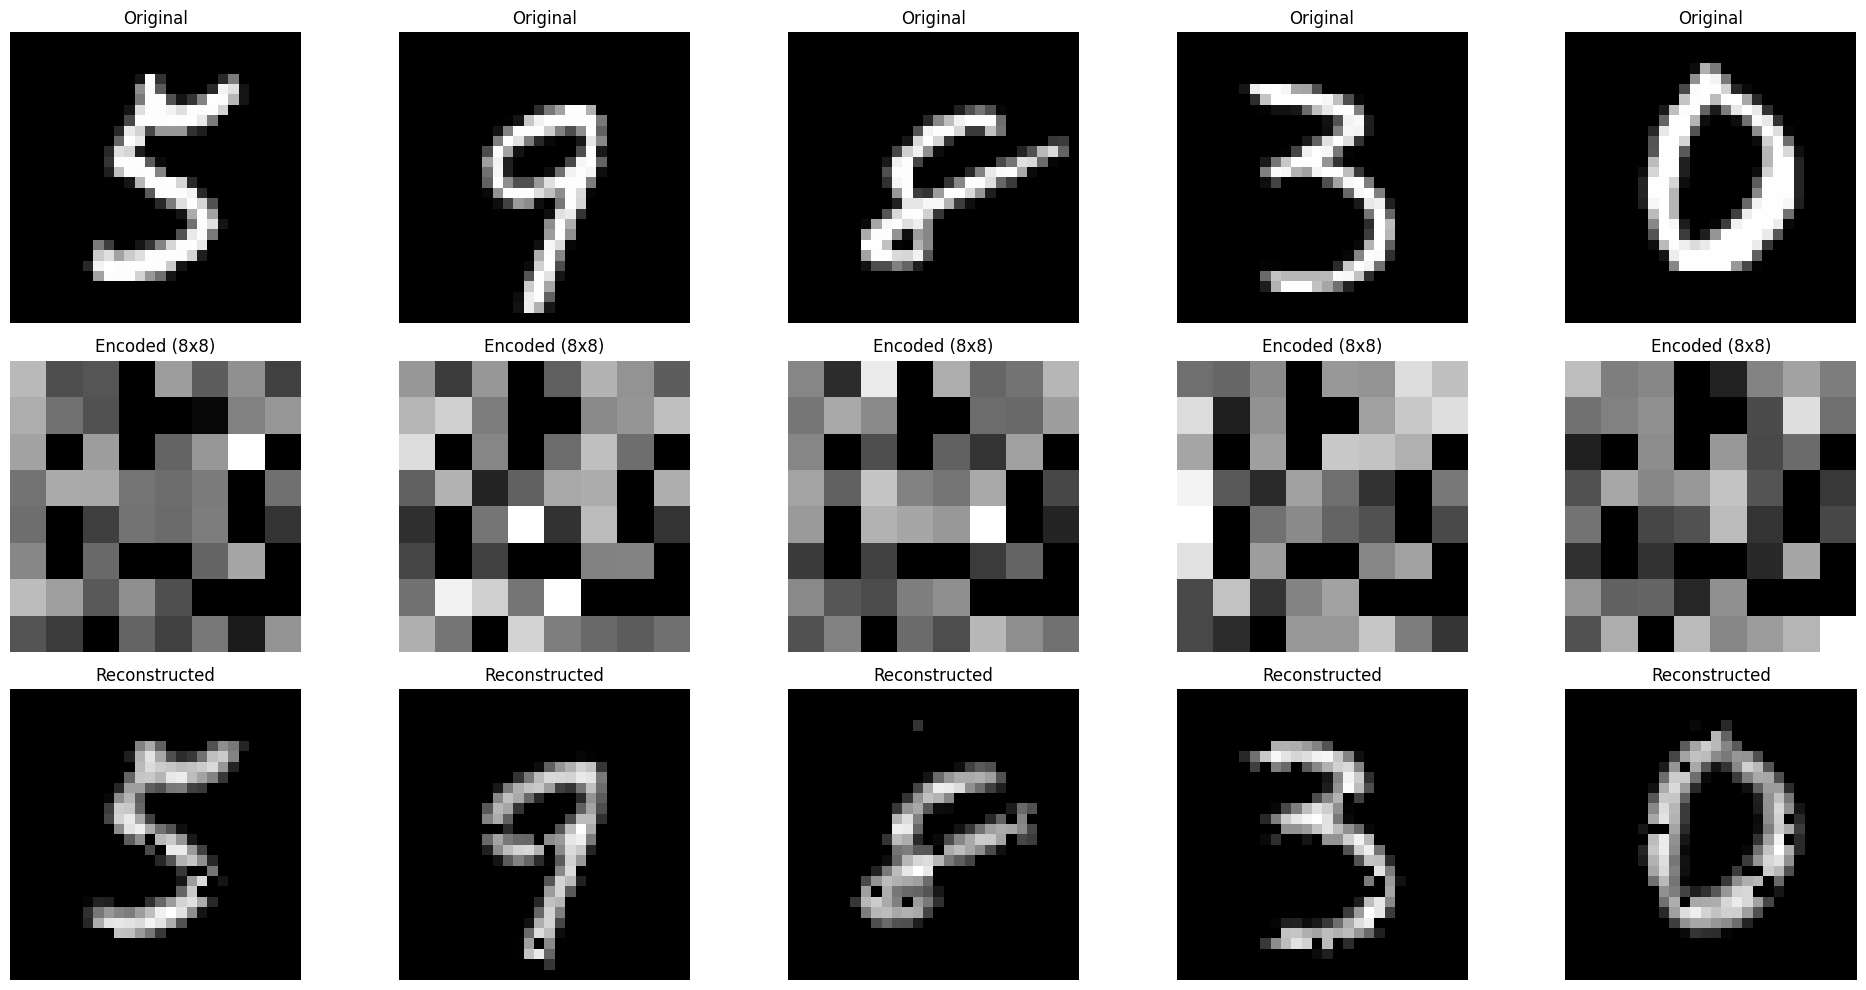

In [6]:
# Get sample data
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=5, shuffle=True)
dataiter = iter(test_loader)
images, _ = next(dataiter)

# Prepare model for inference
model.eval()
with torch.no_grad():
    # Flatten and process images
    images_flattened = images.view(images.size(0), -1).to(device)
    encoded = model.encoder(images_flattened)
    reconstructed = model(images_flattened)

# Convert tensors to numpy arrays
original_imgs = images.squeeze().cpu().numpy()
encoded_imgs = encoded.view(-1, 8, 8).cpu().numpy()  # Reshape encoded to 8x8
reconstructed_imgs = reconstructed.view(-1, 28, 28).cpu().numpy()

# Plot results
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))

for i in range(5):
    # Original Images
    axes[0,i].imshow(original_imgs[i], cmap='gray')
    axes[0,i].set_title('Original')
    axes[0,i].axis('off')

    # Encoded Representations (8x8)
    axes[1,i].imshow(encoded_imgs[i], cmap='gray')
    axes[1,i].set_title('Encoded (8x8)')
    axes[1,i].axis('off')

    # Reconstructed Images
    axes[2,i].imshow(reconstructed_imgs[i], cmap='gray')
    axes[2,i].set_title('Reconstructed')
    axes[2,i].axis('off')

plt.tight_layout()
plt.show()



## References
1. [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
2. [Autoencoder Tutorial](https://www.deeplearningbook.org/contents/autoencoders.html)
3. [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)